# Laboratorio 3 ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)

In [ ]:
# Ruta de acceso

archivo = r"PATH_FILE\online_shoppers_intention.csv"
archivo = pd.read_csv(archivo)

In [ ]:
archivo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
meses_a_numeros = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

archivo['Month'] = archivo['Month'].map(meses_a_numeros)

In [ ]:
archivo = pd.get_dummies(archivo, columns=['VisitorType', 'Weekend'], prefix=['VisitorType', 'Weekend'])

In [ ]:
columnas_dummy = ['VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
archivo[columnas_dummy] = archivo[columnas_dummy].astype(float)

In [ ]:
#Identificar variables numéricas y categóricas
numeric_vars = archivo.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = archivo.select_dtypes(include=['object', 'bool']).columns

In [ ]:
archivo[numeric_vars].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0.0,0.0,1.0,0.0,1.0


In [ ]:
X = StandardScaler().fit_transform(archivo[numeric_vars])
df_subcjto1_esc = pd.DataFrame(X,columns = archivo[numeric_vars].columns) #Se pasan las variables estandarizadas a un dataframe
df_subcjto1_esc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,-0.399087,-0.083316,0.410621,0.550552,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,-0.399087,-0.083316,0.410621,0.550552,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,-0.399087,-0.083316,0.410621,0.550552,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,-0.399087,-0.083316,0.410621,0.550552,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,-0.399087,-0.083316,0.410621,-1.816360,1.816360


## `Se hace reducción de dimensionalidad con PCA`

In [ ]:
pca = PCA()
pca_scores = pca.fit_transform(df_subcjto1_esc)

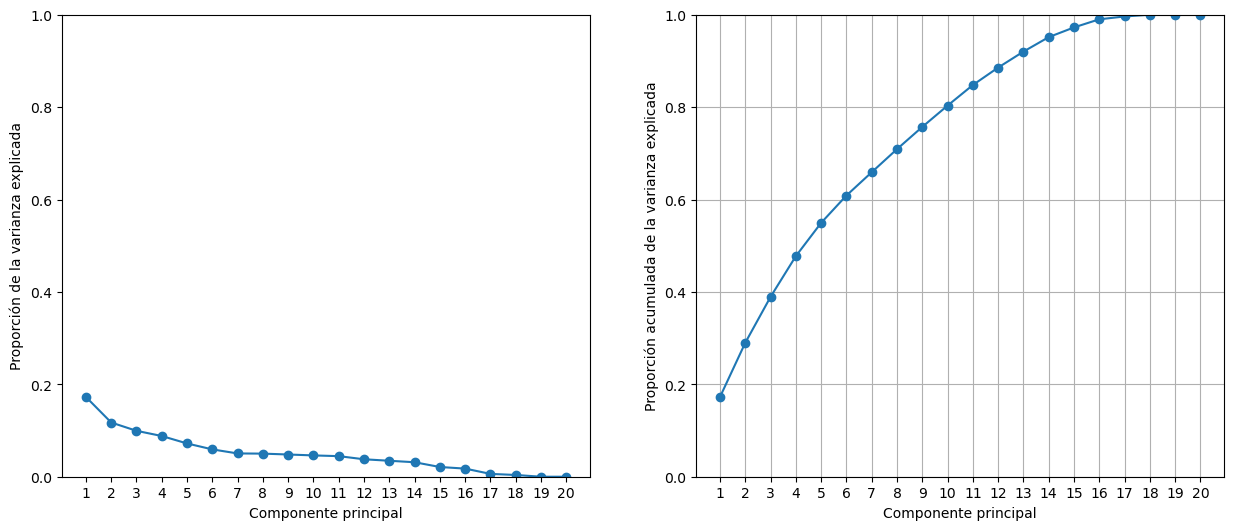

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15,6))
ticks = np.arange(pca.n_components_) + 1

ax[0].plot(ticks, pca.explained_variance_ratio_, marker = 'o')
ax[0].set_xlabel('Componente principal');
ax[0].set_ylabel('Proporción de la varianza explicada')
ax[0].set_ylim([0,1])
ax[0].set_xticks(ticks)

ax[1].plot(ticks, pca.explained_variance_ratio_.cumsum(), marker = 'o')
ax[1].set_xlabel('Componente principal');
ax[1].set_ylabel('Proporción acumulada de la varianza explicada')
ax[1].set_ylim([0,1])
ax[1].grid()
ax[1].set_xticks(ticks)

plt.show()

## `Se escogen 10 componentes, ya que explican el 80% de la varianza`

In [ ]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(df_subcjto1_esc)
PCA_df= pd.DataFrame(data= principalComponents,  columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
PCA_df.shape

(12330, 10)

In [ ]:
pca.explained_variance_ratio_

array([0.17265936, 0.11735465, 0.09937155, 0.08813613, 0.0720073 ,
       0.05914972, 0.05038625, 0.04999977, 0.04808929, 0.04612674])

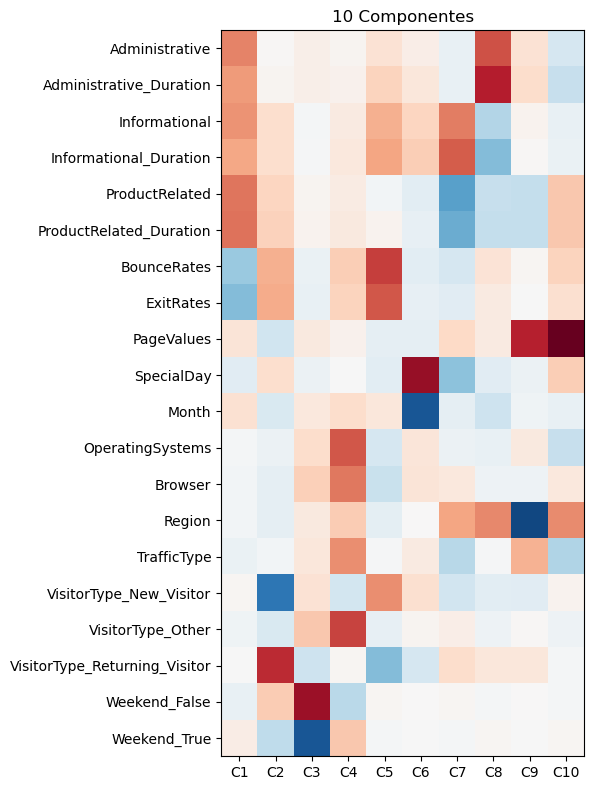

In [ ]:
fig, axes = plt.subplots(figsize=(10, 8))

components = pca.components_.T
vmax = np.abs(components).max()
axes.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
axes.set_yticks(np.arange(len(df_subcjto1_esc.columns)))
axes.set_yticklabels(df_subcjto1_esc.columns)
axes.set_title("10 Componentes")
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(["C1","C2", "C3","C4", "C5","C6", "C7","C8", "C9","C10"])
plt.tight_layout()
plt.show()

In [ ]:
principalComponents

array([[-3.39190006,  2.61934544, -0.43036211, ...,  0.48519286,
         0.44305389,  0.70582692],
       [-1.59283368,  0.86200581,  0.1729024 , ..., -0.16508674,
         0.50012646, -0.41514553],
       [-3.54116277,  2.23442412,  0.30300376, ...,  1.49659094,
        -1.46549537,  1.21790054],
       ...,
       [-1.50107605, -0.03337432, -2.36427325, ..., -0.47417132,
         1.1917629 , -1.0245153 ],
       [-0.12204192,  0.08690827,  0.80402132, ...,  0.34875722,
         0.53404566, -1.10655216],
       [-0.76223116, -3.76574729, -1.73250883, ..., -1.10360268,
        -0.01334199, -0.65657492]])

# Uso de algoritmos supervisados utilizando la base considerando los 10 componentes

## `Decision Tree Classifier`

In [ ]:
# 1. Ajusta PCA al conjunto de datos completo
pca = PCA(n_components=10)
pca.fit(df_subcjto1_esc)  # 'df' es tu DataFrame original que contiene tanto variables numéricas como categóricas

# 2. Extrae los componentes principales
components = pca.transform(df_subcjto1_esc)

# 3. Combina los componentes principales con la variable objetivo
df_pca = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 11)])  # Nuevo DataFrame con componentes principales
df_pca['target'] = archivo['Revenue']  # 'target' es tu variable objetivo

# 4. Divide el DataFrame en conjunto de entrenamiento y conjunto de prueba
X = df_pca.drop('target', axis=1)  # Variables independientes (componentes principales)
y = df_pca['target']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# 5. Entrena un modelo de Arból de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8260340632603407
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.90      0.90      2055
        True       0.48      0.45      0.46       411

    accuracy                           0.83      2466
   macro avg       0.68      0.68      0.68      2466
weighted avg       0.82      0.83      0.82      2466



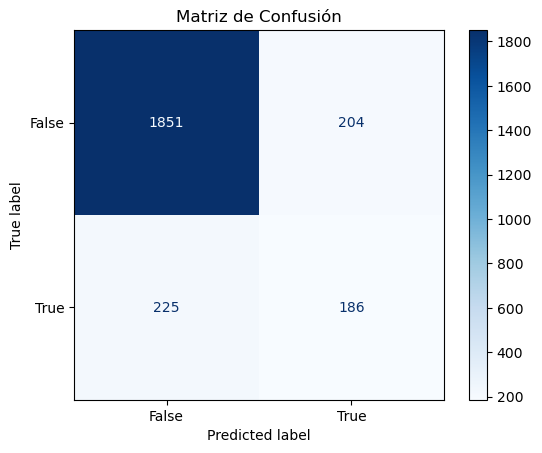

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
# Se hace fine tunning al modelo de arbol de decisión
dtc = DecisionTreeClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras requeridas en una hoja
}

# Realizar una búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros ajustados
best_dtc = grid_search.best_estimator_

# Entrenar el modelo final con los datos de entrenamiento
best_dtc.fit(X_train, y_train)

# Evaluar el modelo en datos de prueba
accuracy = best_dtc.score(X_test, y_test)

print("Mejor profundidad máxima del árbol:", best_dtc.max_depth)
print("Mejor mínimo de muestras para dividir un nodo:", best_dtc.min_samples_split)
print("Mejor mínimo de muestras en una hoja:", best_dtc.min_samples_leaf)
print("Exactitud en datos de prueba:", accuracy)

Mejor profundidad máxima del árbol: 5
Mejor mínimo de muestras para dividir un nodo: 5
Mejor mínimo de muestras en una hoja: 1
Exactitud en datos de prueba: 0.8653690186536902


## `Random Forest`

In [ ]:
# 1. Ajusta PCA al conjunto de datos completo
pca = PCA(n_components=10)
pca.fit(df_subcjto1_esc)  # 'df' es tu DataFrame original que contiene tanto variables numéricas como categóricas

# 2. Extrae los componentes principales
components = pca.transform(df_subcjto1_esc)

# 3. Combina los componentes principales con la variable objetivo
df_pca = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 11)])  # Nuevo DataFrame con componentes principales
df_pca['target'] = archivo['Revenue']  # 'target' es tu variable objetivo

# 4. Divide el DataFrame en conjunto de entrenamiento y conjunto de prueba
X = df_pca.drop('target', axis=1)  # Variables independientes (componentes principales)
y = df_pca['target']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# 5. Entrena un modelo de Regresión Logística
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.875506893755069
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.73      0.41      0.52       411

    accuracy                           0.88      2466
   macro avg       0.81      0.69      0.72      2466
weighted avg       0.86      0.88      0.86      2466



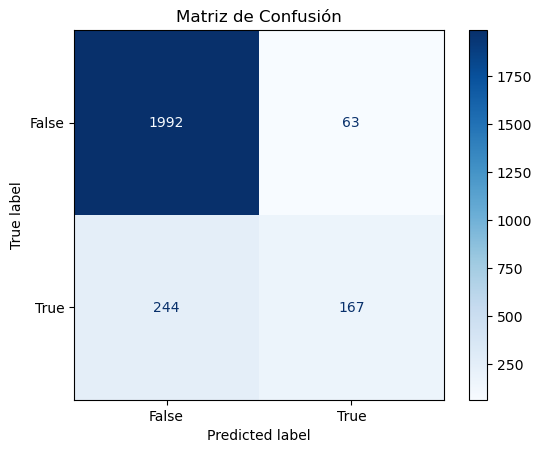

In [ ]:
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

## `SVM`

In [ ]:
# 1. Ajusta PCA al conjunto de datos completo
pca = PCA(n_components=10)
pca.fit(df_subcjto1_esc)  # 'df' es tu DataFrame original que contiene tanto variables numéricas como categóricas

# 2. Extrae los componentes principales
components = pca.transform(df_subcjto1_esc)

# 3. Combina los componentes principales con la variable objetivo
df_pca = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 11)])  # Nuevo DataFrame con componentes principales
df_pca['target'] = archivo['Revenue']  # 'target' es tu variable objetivo

# 4. Divide el DataFrame en conjunto de entrenamiento y conjunto de prueba
X = df_pca.drop('target', axis=1)  # Variables independientes (componentes principales)
y = df_pca['target']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# 5. Entrena un modelo de SVM
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8767234387672344
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.75      0.39      0.51       411

    accuracy                           0.88      2466
   macro avg       0.82      0.68      0.72      2466
weighted avg       0.87      0.88      0.86      2466



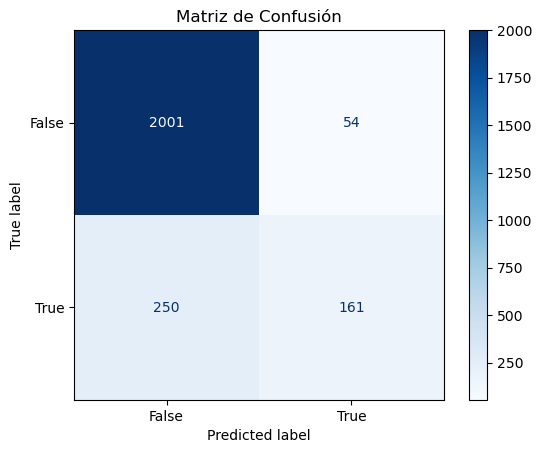

In [ ]:
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Fine Tunning SVC
#svc = SVC()

# Definir el espacio de búsqueda de hiperparámetros
#param_grid = {
#    'C': [0.1, 1, 10],  # Parámetro de regularización
#    'kernel': ['linear', 'rbf'],  # Tipo de kernel
#    'gamma': ['scale', 'auto', 0.1, 1],  # Parámetro gamma (solo para kernel rbf)
#}

# Realizar una búsqueda en cuadrícula para encontrar los mejores hiperparámetros
#grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros ajustados
#best_svc = grid_search.best_estimator_

# Entrenar el modelo final con los datos de entrenamiento
#best_svc.fit(X_train, y_train)

# Evaluar el modelo en datos de prueba
#accuracy = best_svc.score(X_test, y_test)

#print("Mejor valor de C (parámetro de regularización):", best_svc.C)
#print("Mejor tipo de kernel:", best_svc.kernel)
#if best_svc.kernel == 'rbf':
#    print("Mejor valor de gamma (solo para kernel rbf):", best_svc.gamma)
#print("Exactitud en datos de prueba:", accuracy)

## `XGBoost`

In [ ]:
# 1. Ajusta PCA al conjunto de datos completo
pca = PCA(n_components=10)
pca.fit(df_subcjto1_esc)  # 'df' es tu DataFrame original que contiene tanto variables numéricas como categóricas

# 2. Extrae los componentes principales
components = pca.transform(df_subcjto1_esc)

# 3. Combina los componentes principales con la variable objetivo
df_pca = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 11)])  # Nuevo DataFrame con componentes principales
df_pca['target'] = archivo['Revenue']  # 'target' es tu variable objetivo

# 4. Divide el DataFrame en conjunto de entrenamiento y conjunto de prueba
X = df_pca.drop('target', axis=1)  # Variables independientes (componentes principales)
y = df_pca['target']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# 5. Entrena un modelo de XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8730738037307381
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.95      0.93      2055
        True       0.67      0.46      0.55       411

    accuracy                           0.87      2466
   macro avg       0.79      0.71      0.74      2466
weighted avg       0.86      0.87      0.86      2466



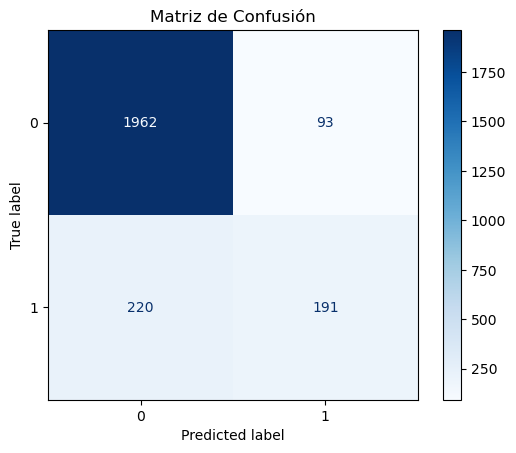

In [ ]:
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

## `AdaBoost`

In [ ]:
# 1. Ajusta PCA al conjunto de datos completo
pca = PCA(n_components=10)
pca.fit(df_subcjto1_esc)  # 'df' es tu DataFrame original que contiene tanto variables numéricas como categóricas

# 2. Extrae los componentes principales
components = pca.transform(df_subcjto1_esc)

# 3. Combina los componentes principales con la variable objetivo
df_pca = pd.DataFrame(components, columns=[f'PC{i}' for i in range(1, 11)])  # Nuevo DataFrame con componentes principales
df_pca['target'] = archivo['Revenue']  # 'target' es tu variable objetivo

# 4. Divide el DataFrame en conjunto de entrenamiento y conjunto de prueba
X = df_pca.drop('target', axis=1)  # Variables independientes (componentes principales)
y = df_pca['target']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba

# 5. Entrena un modelo de AdaBoost
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8726682887266829
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.72      0.39      0.51       411

    accuracy                           0.87      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.86      0.87      0.86      2466



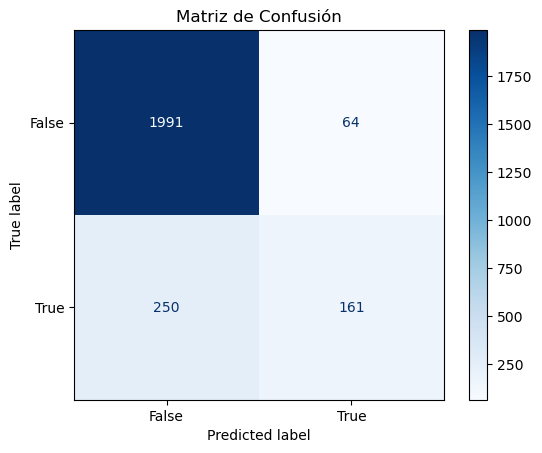

In [ ]:
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()